In [1]:
import pandas as pd
from BRL import *
import optimizer3

In [2]:
data = pd.read_excel('./data/data.xlsx', index_col=0)
input_volumes = pd.read_excel('./data/input_volume.xlsx', index_col=0).values
output_volumes = pd.read_excel('./data/output_volume.xlsx', index_col=0).values

In [3]:
tests = data.iloc[:,1:].values

In [4]:
tests.shape[0]

120

In [5]:
input_volumes.shape

(120, 8)

In [6]:
output_volumes.shape

(120, 8)

In [7]:
tests

array([[ 236,  251,  253, ...,  279,  140,  183],
       [ 211,  190,  164, ...,  243,  126,  138],
       [ 145,  161,  115, ...,  173,   83,   94],
       ...,
       [ 845,  799, 1163, ..., 1144,  534,  607],
       [ 682,  659,  956, ...,  938,  449,  489],
       [ 429,  452,  555, ...,  600,  347,  355]], dtype=int64)

# lambda = 0.1

In [38]:
import numpy as np
generated_volume1 = []
similarities_1 = []
for i in range(tests.shape[0]):
    solution = optimizer3.solve(e_T=tests[i], input_volume=input_volumes[i], w2=596, w3=92, w5=694, w6=913, w8=238, w9=379, lambda2=1)
    x = np.zeros(66)
    if bool(solution):
        for i in solution:
            x[i] = solution[i]
        e = p_matrix@x
        generated_volume1.append(e)
        similarity = np.dot(e, tests[i])/(np.linalg.norm(e)*np.linalg.norm(tests[i]))
        similarities_1.append(similarity)
        errors_1.append(error)

In [42]:
pd.DataFrame(generated_volume1).to_csv('./data/generated_data_1.csv')

# lambda = 0.5

In [52]:
similarities_2 = []
generated_volume2 = []
for i in range(tests.shape[0]):
    solution = optimizer3.solve(e_T=tests[i], input_volume=input_volumes[i], w2=596, w3=92, w5=694, w6=913, w8=238, w9=379, lambda2=5)
    x = np.zeros(66)
    if bool(solution):
        for i in solution:
            x[i] = solution[i]
        e = p_matrix@x
        generated_volume2.append(e)
        similarity = np.dot(e, tests[i])/(np.linalg.norm(e)*np.linalg.norm(tests[i]))
        similarities_2.append(similarity)

In [50]:
generated_volume2

[array([497., 370., 188., 365., 680., 479., 623., 634., 322., 521.]),
 array([475., 334., 184., 301., 639., 257., 576., 605., 246., 467.]),
 array([369., 368., 207., 354., 603., 353., 568., 561., 229., 355.]),
 array([392., 334.,  81., 297., 585., 349., 619., 622., 216., 422.]),
 array([449., 363.,  92., 279., 655., 366., 751., 731., 336., 484.])]

In [53]:
# pd.DataFrame(errors_2).to_csv('2_error.csv')
# pd.DataFrame(similarities_2).to_csv('2_similar.csv')
pd.DataFrame(generated_volume2).to_csv('./data/generated_data_2.csv')

# lambda = 1

In [39]:
similarities_3 = []
generated_volume3 = []
for i in range(tests.shape[0]):
    solution = optimizer3.solve(e_T=tests[i], input_volume=input_volumes[i], w2=596, w3=92, w5=694, w6=913, w8=238, w9=379, lambda2=10)
    x = np.zeros(66)
    if bool(solution):
        for i in solution:
            x[i] = solution[i]
        e = p_matrix@x
        generated_volume3.append(e)
        similarity = np.dot(e, tests[i])/(np.linalg.norm(e)*np.linalg.norm(tests[i]))
        similarities_3.append(similarity)
        errors_3.append(error)

In [46]:
pd.DataFrame(generated_volume3).to_csv('./data/generated_data_3.csv')

# 원래 오차율

In [29]:
import optimizer4

In [35]:
similarities_4 = []
generated_volume = []
for i in range(tests.shape[0]):
    solution = optimizer4.solve(e_T=tests[i], w2=596, w3=92, w5=694, w6=913, w8=238, w9=379)
    x = np.zeros(66)
    if bool(solution):
        for i in solution:
            x[i] = solution[i]
        e = p_matrix@x
        generated_volume.append(e)
        similarity = np.dot(e, tests[i])/(np.linalg.norm(e)*np.linalg.norm(tests[i]))
        similarities_4.append(similarity)

In [56]:
temp = optimizer3.solve(e_T=tests[56], w2=596, w3=92, w5=694, w6=913, w8=238, w9=379)
x = np.zeros(66)
for i in temp:
    x[i] = temp[i]

In [57]:
I_matrix@x

array([   0., 1726., 1054., 1744., 1700., 1419., 1630., 1083.])

In [37]:
pd.DataFrame(generated_volume).to_csv('./data/generated_data.csv')

In [31]:
pd.DataFrame(errors_4).to_csv('4_error.csv')
pd.DataFrame(similarities_4).to_csv('4_similar.csv')

0.977960253029657
0.02306135604417684
[0.9885351669779722, 0.9842730198846998, 0.9717382313202593, 0.9494496735942553, 0.9330760397170207, 0.9018060184636996, 0.91952769200888, 0.9489698165349719, 0.9648824951617023, 0.9756233006329581, 0.9846814905647211, 0.9879209252008342, 0.9852877930454348, 0.984498592524089, 0.989113322397329, 0.9934470590888668, 0.9965188477776256, 0.9948401926948623, 0.9983172643711724, 0.991167352754559, 0.9876978317031458, 0.9935400935739048, 0.9926991299567602, 0.996351730433175, 0.9864311916319369, 0.986151776198756, 0.9852156471544311, 0.9650818061867612, 0.9588489501067197, 0.9230707764300926, 0.9068527100629385, 0.9513873976989471, 0.963595262082857, 0.9762908654108317, 0.9881401679812202, 0.9850221271663065, 0.9857927881488843, 0.987174287745473, 0.9880543444996233, 0.9924606524812831, 0.9959588413347191, 0.9966787080787364, 0.9981454142620332, 0.9929275645575762, 0.9911798542588125, 0.9935843751327719, 0.994065209003984, 0.9958963875575891, 0.989560359

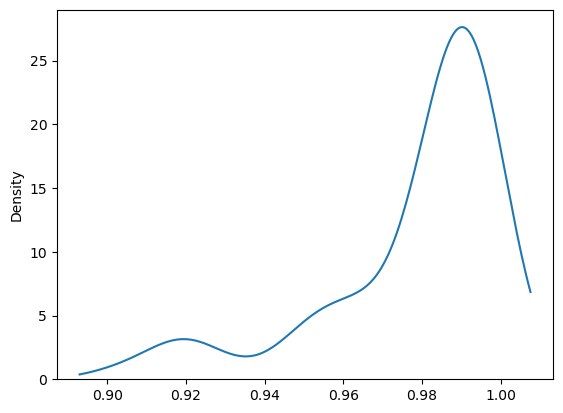

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
mean = np.mean(similarities_4)
std = np.std(similarities_4)
print(mean)
print(std)
print(similarities_4)
# plt.text(mean-0.1*mean, 20, f"Mean : {mean}")
# plt.text(mean-0.1*mean, 15, f"Std : {std}")
sns.kdeplot(similarities_4, cut=1)
plt.show()